# Major Research Project- Regression(No indicator)

### Md Mozahidur Rahman - 501002626

In [31]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import pyplot

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBRegressor

### Data load

In [32]:
#Test.csv 
#df=pd.read_csv('Test.csv')
dataset=pd.read_csv('dataset_after_analysis.csv',encoding= 'unicode_escape')
#dataset=pd.read_csv('Test.csv',encoding= 'unicode_escape')
dataset.head()

,Unnamed: 0,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,0,DEBIT,3,4,91.250000,73,Sporting Goods,Caguas,Puerto Rico,20755,...,Smart watch,327.75,Standard Class,CallyHolloway,2018,1,2,22,0,0
1,1,TRANSFER,5,4,-249.089996,73,Sporting Goods,Caguas,Puerto Rico,19492,...,Smart watch,327.75,Standard Class,IreneLuna,2018,1,5,12,0,1
2,2,CASH,4,4,-247.779999,73,Sporting Goods,San Jose,EE. UU.,19491,...,Smart watch,327.75,Standard Class,GillianMaldonado,2018,1,5,12,0,0
3,3,DEBIT,3,4,22.860001,73,Sporting Goods,Los Angeles,EE. UU.,19490,...,Smart watch,327.75,Standard Class,TanaTate,2018,1,5,11,0,0
4,4,PAYMENT,2,4,134.210007,73,Sporting Goods,Caguas,Puerto Rico,19489,...,Smart watch,327.75,Standard Class,OrliHendricks,2018,1,5,11,0,0


In [33]:
dataset.dtypes

Unnamed: 0                         int64
Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Region    

In [34]:
#Dropping column unimportant
#dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     180519 non-null  int64  
 1   Type                           180519 non-null  object 
 2   Days for shipping (real)       180519 non-null  int64  
 3   Days for shipment (scheduled)  180519 non-null  int64  
 4   Benefit per order              180519 non-null  float64
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Customer Zipcode              

In [36]:
df=dataset.copy()

In [37]:
#dataset.to_csv('clean_dataset_version1.csv')

In [38]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

In [39]:
#convert the categorical columns into numeric

df['Type']              = le.fit_transform(df['Type'])
df['Category Name']     = le.fit_transform(df['Category Name'])
df['Customer City']     = le.fit_transform(df['Customer City'])
df['Customer Country']  = le.fit_transform(df['Customer Country'])
df['Customer Segment']  = le.fit_transform(df['Customer Segment'])
df['Customer State']    = le.fit_transform(df['Customer State'])
df['Department Name']   = le.fit_transform(df['Department Name'])
df['Market']            = le.fit_transform(df['Market'])
df['Order City']        = le.fit_transform(df['Order City'])
df['Order Country']     = le.fit_transform(df['Order Country'])
df['Order Region']      = le.fit_transform(df['Order Region'])
df['Order State']       = le.fit_transform(df['Order State'])
df['Product Name']      = le.fit_transform(df['Product Name'])
df['Shipping Mode']     = le.fit_transform(df['Shipping Mode'])
df['Customer Full Name']= le.fit_transform(df['Customer Full Name'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     180519 non-null  int64  
 1   Type                           180519 non-null  int32  
 2   Days for shipping (real)       180519 non-null  int64  
 3   Days for shipment (scheduled)  180519 non-null  int64  
 4   Benefit per order              180519 non-null  float64
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  int32  
 7   Customer City                  180519 non-null  int32  
 8   Customer Country               180519 non-null  int32  
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  int32  
 11  Customer State                 180519 non-null  int32  
 12  Customer Zipcode              

In [41]:
df.head()

,Unnamed: 0,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,0,1,3,4,91.250000,73,40,66,1,20755,...,78,327.75,3,1876,2018,1,2,22,0,0
1,1,3,5,4,-249.089996,73,40,66,1,19492,...,78,327.75,3,5378,2018,1,5,12,0,1
2,2,0,4,4,-247.779999,73,40,452,0,19491,...,78,327.75,3,4429,2018,1,5,12,0,0
3,3,1,3,4,22.860001,73,40,285,0,19490,...,78,327.75,3,12929,2018,1,5,11,0,0
4,4,2,2,4,134.210007,73,40,66,1,19489,...,78,327.75,3,10638,2018,1,5,11,0,0


In [42]:
df.apply(lambda x: sum(x.isnull())) #Checking missing values

Unnamed: 0                       0
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Region                     0
Order State                      0
Product Name                     0
Product Price                    0
Shipping Mode       

In [43]:
xs=df.loc[:, df.columns != 'Sales']
ys=df['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)

In [44]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)

In [45]:
def regression_model(model_s,xs_train, xs_test,ys_train,ys_test):
    model_s=model_s.fit(xs_train,ys_train)#Fitting train data for sales    
    ys_pred=model_s.predict(xs_test)#predicting sales with test data    
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used    
    #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    return ys_pred

In [46]:
linear=LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticNet = ElasticNet(alpha=.0001, l1_ratio=.0001, random_state=0)
dt = tree.DecisionTreeRegressor()
randomforest = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
xgbboost = xgb.XGBRegressor()

In [47]:
y_linear = regression_model(linear,xs_train, xs_test,ys_train,ys_test)
y_lasso = regression_model(lasso,xs_train, xs_test,ys_train,ys_test)
y_ridge = regression_model(ridge,xs_train, xs_test,ys_train,ys_test)
y_elastic = regression_model(elasticNet,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: LinearRegression()
MAE of sales is         : 18.359645002968474
RMSE of sales is        : 30.80772589240085
Model parameter used are: Lasso(alpha=0.1)
MAE of sales is         : 17.69348938372995
RMSE of sales is        : 30.990658891571297
Model parameter used are: Ridge(alpha=0.1)
MAE of sales is         : 18.36090872825143
RMSE of sales is        : 30.807666076544386
Model parameter used are: ElasticNet(alpha=0.0001, l1_ratio=0.0001, random_state=0)
MAE of sales is         : 18.672366354266153
RMSE of sales is        : 31.05510335470985


In [48]:
y_dt = regression_model(dt,xs_train, xs_test,ys_train,ys_test)
y_rf = regression_model(randomforest,xs_train, xs_test,ys_train,ys_test)
y_xgboost = regression_model(xgbboost,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: DecisionTreeRegressor()
MAE of sales is         : 1.2571206798045264e-11
RMSE of sales is        : 1.8280275915874825e-11
Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 0.016493853306391516
RMSE of sales is        : 0.2972400064792029
Model parameter used are: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE of sales is         : 0.014244976730356598
RMSE of sales is        : 0.09567

Create a dataframe on results and read to csv file for future analysis in tableau

In [49]:
d = {"MODELS": ["Linear Regression","Lasso Regression","Ridge Regression", "ElasticNet Regression","Decision Tree Regressor","Random Forest Regressor", "Xgb Regressor"], "MAE": [18.35,17.69,18.36,18.67,1.25,0.016,0.014], "RMSE": [30.80,30.99,30.80,31.05,1.82,0.29,0.09]}
data_result_no_bias = pd.DataFrame(data=d)
data_result_no_bias.to_csv('data_result_no_bias.csv')

Important feature extraction on best model

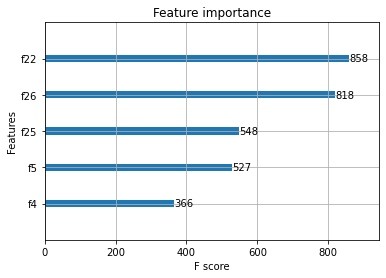

In [50]:
from xgboost import plot_importance
import matplotlib.pylab as plt
from matplotlib import pyplot
plot_importance(xgbboost, max_num_features=5) # top 10 most important features
plt.show()

### Here f22 means feature number 22
#### f22 - Order Item Profit Ratio 
#### f26 - Order State
#### f25 - Order Region
#### f5 - Benefit per order
#### f4 -  Days for shipment (scheduled)